# Project Description: 
E-commerce

# Context 
Everyday a million products are being recommended to users based on
popularity and other metrics on e-commerce websites. The most popular e-commerce
website boosts average order value by 50%, increases revenues by 300%, and
improves conversion. In addition to being a powerful tool for increasing revenues,
product recommendations are so essential that customers now expect to see similar
features on all other eCommerce sites.. 

# Data Description

Data columns- First three columns are userId, productId, and ratings and the fourth
column is timestamp. You can discard the timestamp column as in this case you may
not need to use it

# Data Source and Format

Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The
repository has several datasets. For this case study, we are using the Electronics
dataset.
Format:CSV

# 1. Reading Data File and Explore

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise.model_selection import train_test_split
from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans
from surprise import accuracy

In [35]:
df=pd.read_csv('D:\\greatlearning\\studydata\\Reccomendation_System\\Week_3_Project\\ratings_Electronics.csv')
df.columns=['user_id','productId','ratings','timestamp']
df.drop('timestamp',axis=1,inplace=True)
df.head()

,user_id,productId,ratings
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
user_id      object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [37]:
df.isnull().sum()

user_id      0
productId    0
ratings      0
dtype: int64

In [38]:
print('Number of records in Dataset are:{a}'.format(a=len(df)))
print('Number of unique records in USER_ID columns are:{a}'.format(a=df['user_id'].nunique()))
print('Number of unique records in PRODUCT_ID columns are:{a}'.format(a=df['productId'].nunique()))

Number of records in Dataset are:7824481
Number of unique records in USER_ID columns are:4201696
Number of unique records in PRODUCT_ID columns are:476001


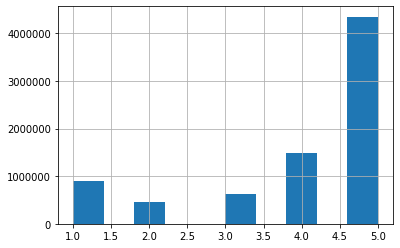

In [39]:
df['ratings'].hist()

# 2.Take a subset of the dataset to make it less sparse/ denser

In [40]:
counts1 = df['user_id'].value_counts()
# print(counts1)
df = df[df['user_id'].isin(counts1[counts1 >= 50].index)]

# 3.Build Popularity Recommender model(as facing any memory issue so 10% data taken)

In [41]:
df=df.head(12000)

In [42]:
len(df)

12000

In [43]:
df.groupby('productId')['ratings'].mean().head() 

productId
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: ratings, dtype: float64

In [44]:
df.groupby('productId')['ratings'].mean().sort_values(ascending=False).head()  

productId
0594451647    5.0
B000067SPL    5.0
B000067SPN    5.0
B0000DHVN3    5.0
B0000DHVFD    5.0
Name: ratings, dtype: float64

In [45]:
df.groupby('productId')['ratings'].count().sort_values(ascending=False).head()  

productId
B00004ZCJE    72
B0002L5R78    67
B00007E7JU    60
B0000BZL1P    44
B00017LSPI    43
Name: ratings, dtype: int64

In [46]:
ratings_mean_count = pd.DataFrame(df.groupby('productId')['ratings'].mean()) 

In [47]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('productId')['ratings'].count())

In [48]:
ratings_mean_count.head()  

,ratings,rating_counts
productId,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [49]:
ratings_mean_count['rank']=ratings_mean_count['ratings'].rank(ascending=0, method='first') 
ratings_mean_count.head(20)

,ratings,rating_counts,rank
productId,,,
0594451647,5.000000,1,1.0
0594481813,3.000000,1,5051.0
0970407998,2.500000,2,5566.0
0972683275,4.750000,4,2950.0
1400501466,3.333333,6,5002.0
1400501520,5.000000,1,2.0
1400501776,4.500000,2,3160.0
1400532620,3.000000,2,5052.0
1400532655,3.833333,6,4807.0


# 5.1.Build Collaborative Filtering model(USER-USER)

In [50]:
ratings_mean_count=ratings_mean_count.sort_values(by='rank').head(5)

In [51]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df, reader)

In [52]:
trainset, testset = train_test_split(data, test_size=.30)

In [53]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [54]:
test_pred = algo.test(testset)

In [55]:
test_pred

[Prediction(uid='A3LWC833HQIG7J', iid='B00001P4XA', r_ui=5.0, est=4.875, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2XX2A4OJCDNLZ', iid='B0000EWNW4', r_ui=3.0, est=4.265595238095238, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A362FM6FYA1SYS', iid='B00006I5J7', r_ui=5.0, est=4.6, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A25HBO5V8S8SEA', iid='B00023440W', r_ui=5.0, est=4.265595238095238, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1CPRP3VFJRS1R', iid='B000066AX5', r_ui=1.0, est=3.4210526315789473, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AYNAH993VDECT', iid='B0002L5R78', r_ui=5.0, est=4.666666666666667, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2L36AGL8CKY3D', iid='B0002D0E7E', r_ui=5.0, est=4.265595238095238, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'

# 6.1.Evaluate the above model-USER-USER

In [56]:
print("user_based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

user_based Model : Test Set
RMSE: 1.1687


1.1686799990967158

# 5.2.Build Collaborative Filtering model(PRODUCT-PRODUCT)

In [57]:
algo_product = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_product.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [58]:
test_pred_product = algo_product.test(testset)

In [59]:
test_pred_product

[Prediction(uid='A3LWC833HQIG7J', iid='B00001P4XA', r_ui=5.0, est=4.142857142857143, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2XX2A4OJCDNLZ', iid='B0000EWNW4', r_ui=3.0, est=4.265595238095238, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A362FM6FYA1SYS', iid='B00006I5J7', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A25HBO5V8S8SEA', iid='B00023440W', r_ui=5.0, est=4.265595238095238, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1CPRP3VFJRS1R', iid='B000066AX5', r_ui=1.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AYNAH993VDECT', iid='B0002L5R78', r_ui=5.0, est=4.651162790697675, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2L36AGL8CKY3D', iid='B0002D0E7E', r_ui=5.0, est=4.265595238095238, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 

# 6.2.Evaluate the above model-PRODUCT-PRODUCT

In [60]:
print("product_based Model : Test Set")
accuracy.rmse(test_pred_product, verbose=True)

product_based Model : Test Set
RMSE: 1.2444


1.2443712359531225

# 7.1 Get top - K ( K = 5) recommendations for Popularity based

In [61]:
def recommend(user_id):     
    user_recommendations = ratings_mean_count
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [62]:
find_recom = [15,121,53]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 15

            userID  ratings  rating_counts  rank
productId                                       
0594451647      15      5.0              1   1.0
1400501520      15      5.0              1   2.0
1400699169      15      5.0              1   3.0
1685560148      15      5.0              1   4.0
3744295508      15      5.0              1   5.0


Here is the recommendation for the userId: 121

            userID  ratings  rating_counts  rank
productId                                       
0594451647     121      5.0              1   1.0
1400501520     121      5.0              1   2.0
1400699169     121      5.0              1   3.0
1685560148     121      5.0              1   4.0
3744295508     121      5.0              1   5.0


Here is the recommendation for the userId: 53

            userID  ratings  rating_counts  rank
productId                                       
0594451647      53      5.0              1   1.0
1400501520      53   

# 8.Summarise your insights

Summarise your insights.

product-based and user based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of 
the user and Products, it is not dependent on any additional information.

The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be 
not suitable to the user.You can see the differance above for the user id 15,121,53 The Popularity based model has recommended 
the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the 
user past purchase history